In [1]:
import numpy as np
import pandas as pd

from sentence_transformers import SentenceTransformer

from sklearn.decomposition import PCA
from sklearn.metrics import DistanceMetric

import matplotlib.pyplot as plt
import matplotlib as mpl

d:\Ariana\Facultate\SEM5\MIRPR\FastApi-Ionic_Tester\all-MiniLM-L6-v2\.venv\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [2]:
MODEL_PATH = 'D:/Ariana/Facultate/SEM5/MIRPR/FastApi-Ionic_Tester/all-MiniLM-L6-v2/Modele'

# Încarcă modelul pre-antrenat
model = SentenceTransformer(MODEL_PATH)

C:\Users\ariis\AppData\Local\Temp\ipykernel_3432\3717517205.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['cuvant'][data['cuvant'].iloc[-1] == data['cuvant']] = "Other" # relabel random role as "other"


[0.11379842 0.10581439]


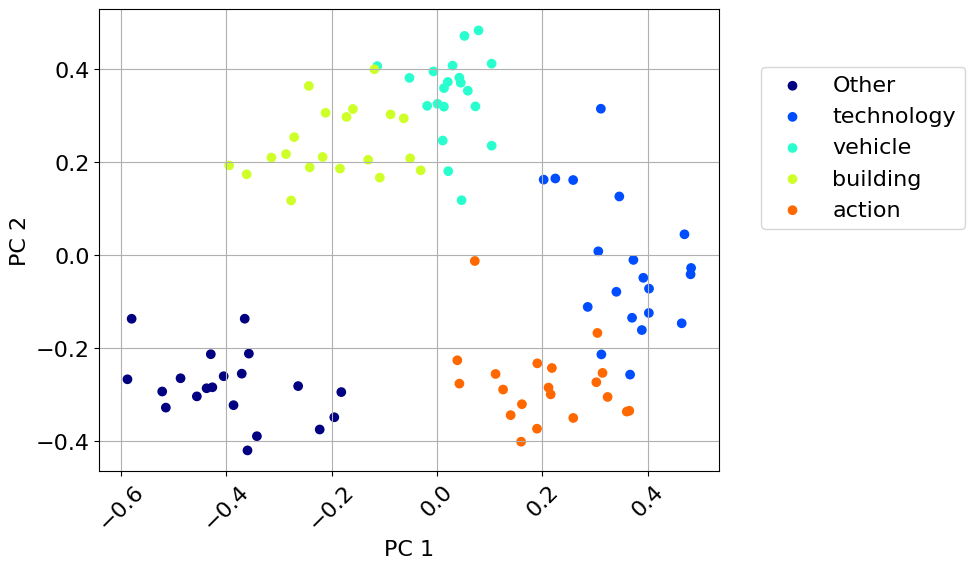

In [3]:
data = pd.read_csv('smaller.csv')
data['cuvant'][data['cuvant'].iloc[-1] == data['cuvant']] = "Other" # relabel random role as "other"
data.head()


# embed vectors
embedding_arr = model.encode(data['descriere'])
embedding_arr.shape

# apply PCA to embeddings
pca = PCA(n_components=2).fit(embedding_arr)
print(pca.explained_variance_ratio_)

# plot data along PCA components
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 16})
plt.grid()

c=0
cmap = mpl.colormaps['jet']
for role in data['cuvant'].unique():
    idx = np.where(data['cuvant']==role)
    plt.scatter(pca.transform(embedding_arr)[idx,0], pca.transform(embedding_arr)[idx,1], c=[cmap(c)]*len(idx[0]), label=role)
    c = c + 1/len(data['cuvant'].unique())
    
plt.legend(bbox_to_anchor=(1.05, 0.9))
plt.xticks(rotation = 45)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()


In [4]:

#query = "activity performed to achieve a goal"
query = "machine that uses energy to move"
#query = "creatures can live on land and in water"

# embed query
query_embedding = model.encode(query)

# define distance metric
dist = DistanceMetric.get_metric('euclidean') # other distances: manhattan, chebyshev

# compute pair wise distances between query embedding and all resume embeddings
dist_arr = dist.pairwise(embedding_arr, query_embedding.reshape(1, -1)).flatten()
# sort results
idist_arr_sorted = np.argsort(dist_arr)

# print roles of top 10 closest resumes to query in embedding space
print(data['descriere'].iloc[idist_arr_sorted[:10]])

22                   A device that uses energy to move.
71    A machine powered by energy to carry people or...
24    A machine equipped with wheels and an engine f...
74    A machine used for transportation purposes on ...
28       A motorized equipment used to transport goods.
72    A wheeled device used for moving people, goods...
73    A transport device capable of moving across va...
26    A device that allows fast movement over long d...
76    A device capable of moving autonomously or wit...
64    Innovations in machines and systems that impro...
Name: descriere, dtype: object


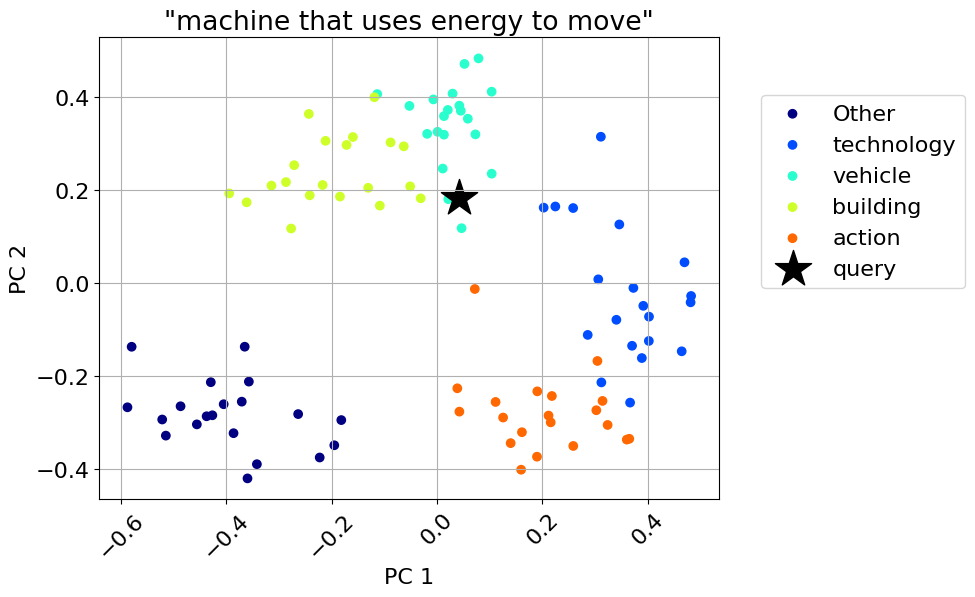

In [5]:
# plot query along with resumes using PCA components
query_pca = pca.transform(query_embedding.reshape(1, -1))[0]

plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 16})
plt.grid()

c=0
cmap = mpl.colormaps['jet']
for role in data['cuvant'].unique():
    idx = np.where(data['cuvant']==role)
    plt.scatter(pca.transform(embedding_arr)[idx,0], pca.transform(embedding_arr)[idx,1], c=[cmap(c)]*len(idx[0]), label=role)
    c = c + 1/len(data['cuvant'].unique())

plt.scatter(query_pca[0], query_pca[1], c='k', marker='*', s=750, label='query')
    
plt.legend(bbox_to_anchor=(1.05, 0.9))
plt.xticks(rotation = 45)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title('"' + query + '"')
plt.show()